<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Renk_Filtreleme_Projesi_HSV_ile_K%C4%B1rm%C4%B1z%C4%B1_Nesne_Tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Colab'da cv2.imshow yerine

In [ ]:
#2. Adım: Örnek Görüntüyü Yükleme


In [15]:
# Kırmızı top görüntüsü indir
#!wget -O red_object.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/stuff.jpg
# Görüntüyü oku ve boyutlandır
img = cv2.imread('/content/red_object.jpg')
img = cv2.resize(img, (640, 480))  # İşlem hızı için boyut küçültme

3. Adım: HSV Renk Uzayına Dönüşüm


In [16]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # BGR -> HSV dönüşümü

4. Adım: Kırmızı Renk için Maske Oluşturma
*(HSV'de kırmızı iki aralıkta bulunur: 0-10 ve 160-180)*

In [17]:
# Kırmızı renk aralıkları
lower_red1 = np.array([0, 100, 100])    # Kırmızı alt sınır (1. aralık)
upper_red1 = np.array([10, 255, 255])   # Kırmızı üst sınır (1. aralık)
lower_red2 = np.array([160, 100, 100])  # Kırmızı alt sınır (2. aralık)
upper_red2 = np.array([180, 255, 255])  # Kırmızı üst sınır (2. aralık)

# Maskeleri oluştur
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)  # İki maskeyi birleştir

5. Adım: Maskeyi Görüntüye Uygulama


In [18]:
# Maskelenmiş görüntüyü oluştur
filtered_img = cv2.bitwise_and(img, img, mask=mask)

6. Adım: Sonuçları Görselleştirme


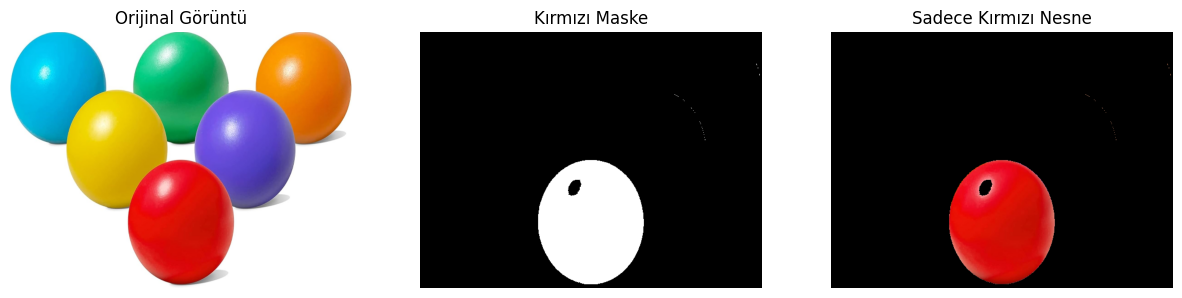

In [19]:
plt.figure(figsize=(15, 5))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Orijinal Görüntü')
plt.axis('off')

# HSV Maskesi
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Kırmızı Maske')
plt.axis('off')

# Filtrelenmiş Görüntü
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Sadece Kırmızı Nesne')
plt.axis('off')

plt.show()

7. Adım: Nesnenin Koordinatlarını Bulma (Opsiyonel)


Nesne Konumu: X=221, Y=241, Genişlik=198, Yükseklik=232


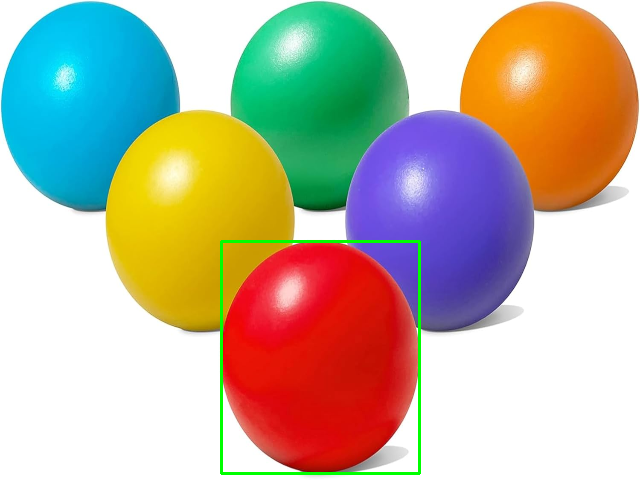

In [20]:
# Maskedeki konturları bul
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# En büyük konturu seç (ana kırmızı nesne)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Dikdörtgen çiz
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Koordinatları yazdır
    print(f"Nesne Konumu: X={x}, Y={y}, Genişlik={w}, Yükseklik={h}")

    # Çerçeveli görüntüyü göster
    cv2_imshow(img)
else:
    print("Kırmızı nesne bulunamadı!")